# Power Data

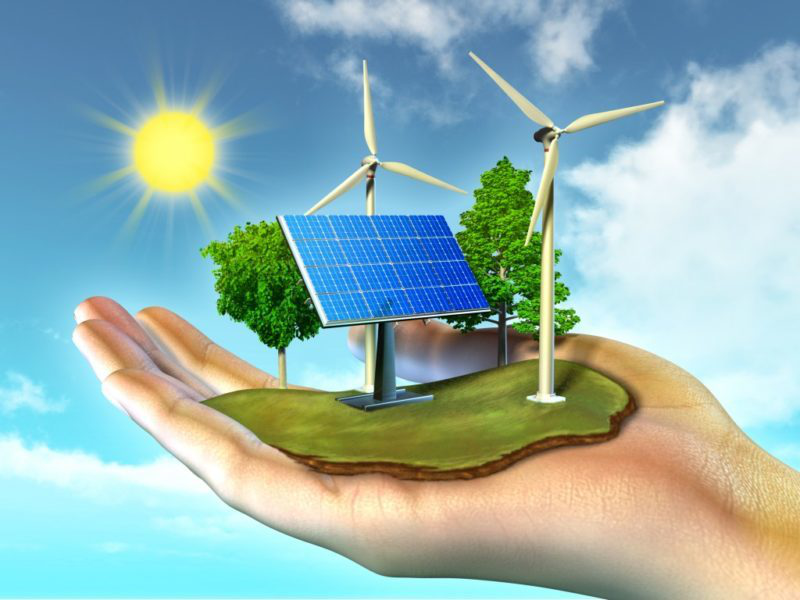

In [50]:
from PIL import Image
Image.open('renewable_energy_sources-e1551858601606.jpg')

#https://watchwire.ai/procuring-green-energy/ 

#Student Name : Parth Vachhani
#Enroll Id    : 44192

In [51]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Power Data of United States(Los Angeles)

In [52]:
df=pd.read_csv("POWER_Point_Daily_20210101_20210331_040d4408N_099d5280W_LST.csv", skiprows=18)
df                                                                                                   #reading csv

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,WS2M,T2M,TS,QV2M,RH2M,PRECTOTCORR,WS10M,WS50M
0,2021,1,1,3.57,3.57,2.57,11.42,10.68,3.66,44.25,0.0,3.91,5.80
1,2021,1,2,3.16,3.45,1.30,11.70,10.68,5.31,62.25,0.0,1.88,2.41
2,2021,1,3,2.55,3.32,0.94,11.15,10.57,5.43,64.75,0.0,1.38,1.87
3,2021,1,4,2.80,3.39,1.40,11.94,11.07,5.98,68.75,0.0,1.93,2.36
4,2021,1,5,2.35,3.55,2.02,11.80,11.13,5.31,64.25,0.0,3.15,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021,3,27,6.99,7.01,1.69,15.40,15.32,4.03,40.94,0.0,2.56,3.71
86,2021,3,28,7.09,7.10,1.91,18.86,17.85,4.46,35.38,0.0,2.91,4.02
87,2021,3,29,6.84,6.99,1.84,17.99,17.57,5.37,44.44,0.0,2.76,3.58
88,2021,3,30,6.28,7.02,1.53,15.91,16.65,4.94,48.44,0.0,2.44,3.75


# Data Cleaning

In [53]:
df = df.rename({'YEAR':'year','MO':'month','DY':'day','ALLSKY_SFC_SW_DWN':'Allsky_downward_irradiation',
               'CLRSKY_SFC_SW_DWN':'Clrsky_downward_irradiation', 'WS2M':'Windspeed_2meter', 'T2M':'Temp_2meter',
               'QV2M':'Specific_humidity_2meter', 'RH2M':'Relative_humidity_2meter', 'PRECTOTCORR':'Precipitation',
               'WS10M':'Windspeed_10meter', 'WS50M':'Windspeed_50meter','TS':'Earth_skintemp'},axis=1)
df.head()
                                                                                     #renaming column

,year,month,day,Allsky_downward_irradiation,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Precipitation,Windspeed_10meter,Windspeed_50meter
0,2021,1,1,3.57,3.57,2.57,11.42,10.68,3.66,44.25,0.0,3.91,5.80
1,2021,1,2,3.16,3.45,1.30,11.70,10.68,5.31,62.25,0.0,1.88,2.41
2,2021,1,3,2.55,3.32,0.94,11.15,10.57,5.43,64.75,0.0,1.38,1.87
3,2021,1,4,2.80,3.39,1.40,11.94,11.07,5.98,68.75,0.0,1.93,2.36
4,2021,1,5,2.35,3.55,2.02,11.80,11.13,5.31,64.25,0.0,3.15,4.59


# Combining Year, Month and Day as Date

In [54]:
df['date']=pd.to_datetime(df[['year','month','day']])
df.head()                                                                              #editing date column 

,year,month,day,Allsky_downward_irradiation,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Precipitation,Windspeed_10meter,Windspeed_50meter,date
0,2021,1,1,3.57,3.57,2.57,11.42,10.68,3.66,44.25,0.0,3.91,5.80,2021-01-01
1,2021,1,2,3.16,3.45,1.30,11.70,10.68,5.31,62.25,0.0,1.88,2.41,2021-01-02
2,2021,1,3,2.55,3.32,0.94,11.15,10.57,5.43,64.75,0.0,1.38,1.87,2021-01-03
3,2021,1,4,2.80,3.39,1.40,11.94,11.07,5.98,68.75,0.0,1.93,2.36,2021-01-04
4,2021,1,5,2.35,3.55,2.02,11.80,11.13,5.31,64.25,0.0,3.15,4.59,2021-01-05


# Removing some columns

In [55]:
df = df.drop(['year','month','day','Precipitation'],axis=1)
df.head()                                                                              #removing unwanted columns

,Allsky_downward_irradiation,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,date
0,3.57,3.57,2.57,11.42,10.68,3.66,44.25,3.91,5.80,2021-01-01
1,3.16,3.45,1.30,11.70,10.68,5.31,62.25,1.88,2.41,2021-01-02
2,2.55,3.32,0.94,11.15,10.57,5.43,64.75,1.38,1.87,2021-01-03
3,2.80,3.39,1.40,11.94,11.07,5.98,68.75,1.93,2.36,2021-01-04
4,2.35,3.55,2.02,11.80,11.13,5.31,64.25,3.15,4.59,2021-01-05


In [56]:
titles = list(df.columns)
titles[0],titles[9]=titles[9],titles[0]                                                 #reordering the index

In [57]:
df = df[titles]
df.head()

,date,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Allsky_downward_irradiation
0,2021-01-01,3.57,2.57,11.42,10.68,3.66,44.25,3.91,5.80,3.57
1,2021-01-02,3.45,1.30,11.70,10.68,5.31,62.25,1.88,2.41,3.16
2,2021-01-03,3.32,0.94,11.15,10.57,5.43,64.75,1.38,1.87,2.55
3,2021-01-04,3.39,1.40,11.94,11.07,5.98,68.75,1.93,2.36,2.80
4,2021-01-05,3.55,2.02,11.80,11.13,5.31,64.25,3.15,4.59,2.35


In [58]:
df9=df.iloc[0:5,:]
df9

,date,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Allsky_downward_irradiation
0,2021-01-01,3.57,2.57,11.42,10.68,3.66,44.25,3.91,5.80,3.57
1,2021-01-02,3.45,1.30,11.70,10.68,5.31,62.25,1.88,2.41,3.16
2,2021-01-03,3.32,0.94,11.15,10.57,5.43,64.75,1.38,1.87,2.55
3,2021-01-04,3.39,1.40,11.94,11.07,5.98,68.75,1.93,2.36,2.80
4,2021-01-05,3.55,2.02,11.80,11.13,5.31,64.25,3.15,4.59,2.35


In [59]:
df.describe()                                                                   #describing value of all columns

,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Allsky_downward_irradiation
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.027889,2.378333,12.518222,12.417111,4.965889,56.946111,3.453333,4.756111,4.538111
std,1.148856,0.954081,2.823486,2.272872,1.107400,15.894639,1.342130,1.947298,1.401269
min,3.320000,0.940000,5.930000,6.990000,2.440000,27.620000,1.380000,1.850000,1.870000
25%,3.942500,1.700000,11.097500,11.152500,4.270000,42.215000,2.470000,3.252500,3.370000
50%,4.875000,2.130000,12.380000,12.335000,4.940000,57.875000,3.150000,4.605000,4.505000
75%,5.965000,2.905000,13.877500,13.415000,5.755000,69.857500,4.125000,5.815000,5.662500
max,7.290000,6.250000,19.640000,17.850000,7.390000,84.750000,8.800000,11.760000,7.090000


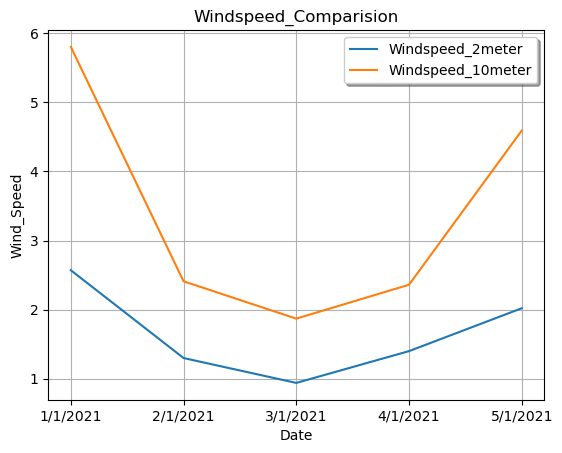

In [60]:
Date = df9['date']
Windspeed_2meter = df9['Windspeed_2meter']
Windspeed_10meter = df9['Windspeed_50meter']
plt.plot(Date,Windspeed_2meter,label='Windspeed_2meter')
plt.plot(Date,Windspeed_10meter,label='Windspeed_10meter')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Wind_Speed')
plt.xticks(Date,['1/1/2021','2/1/2021','3/1/2021','4/1/2021','5/1/2021'])
plt.title('Windspeed_Comparision')
plt.legend(shadow=True)
plt.show()                                  #windspeed comparision at 2 different distances by linegraph of USA

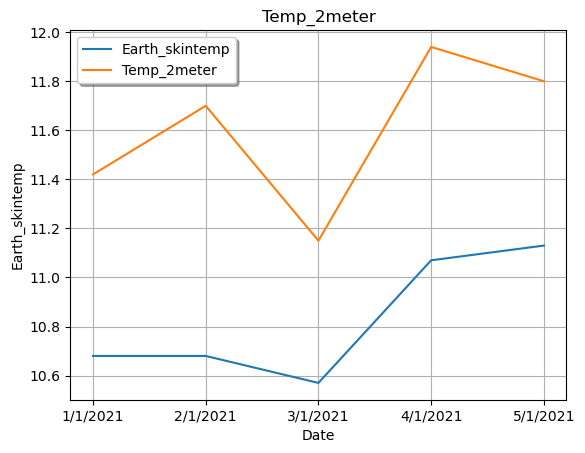

In [61]:
Date = df9['date']
Earth_skintemp = df9['Earth_skintemp']
Temp_2meter = df9['Temp_2meter']
plt.plot(Date,Earth_skintemp,label='Earth_skintemp')
plt.plot(Date,Temp_2meter,label='Temp_2meter')
plt.xlabel('Date')
plt.ylabel('Earth_skintemp')
plt.xticks(Date,['1/1/2021','2/1/2021','3/1/2021','4/1/2021','5/1/2021'])
plt.title('Temp_2meter')
plt.grid()
plt.legend(shadow=True)                                                     #comparing earthskin_temp. to temp._2_meter by line graph
plt.show()

# Specific data of January month

In [62]:
df2=df.iloc[0:5,:]                                                    #value of specific January month
df2

,date,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Earth_skintemp,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Allsky_downward_irradiation
0,2021-01-01,3.57,2.57,11.42,10.68,3.66,44.25,3.91,5.80,3.57
1,2021-01-02,3.45,1.30,11.70,10.68,5.31,62.25,1.88,2.41,3.16
2,2021-01-03,3.32,0.94,11.15,10.57,5.43,64.75,1.38,1.87,2.55
3,2021-01-04,3.39,1.40,11.94,11.07,5.98,68.75,1.93,2.36,2.80
4,2021-01-05,3.55,2.02,11.80,11.13,5.31,64.25,3.15,4.59,2.35


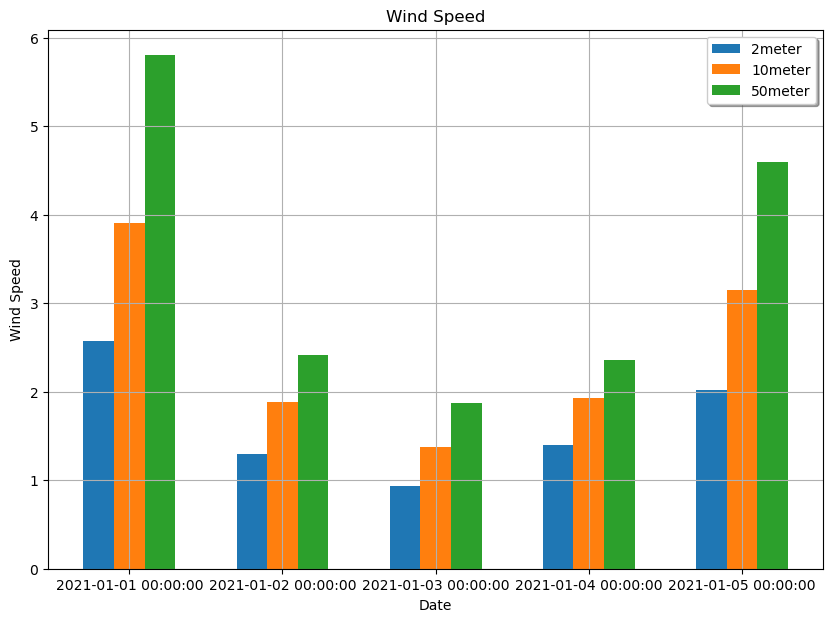

In [63]:
Dates = df2['date']

wind2m = df2['Windspeed_2meter']
wind10m = df2['Windspeed_10meter']
wind50m = df2['Windspeed_50meter']
w=0.2

plt.figure(figsize=(10,7))
wind2m_bar = np.arange(len(Dates))
wind10m_bar = [i+w for i in wind2m_bar]
wind50m_bar = [i+w for i in wind10m_bar]

plt.bar(wind2m_bar,wind2m,width=w,label='2meter')
plt.bar(wind10m_bar,wind10m,width=w,label='10meter')
plt.bar(wind50m_bar,wind50m,width=w,label='50meter')

plt.xticks(wind2m_bar+w,Dates)
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Wind Speed')
plt.grid()
plt.legend(shadow=True)
plt.show()

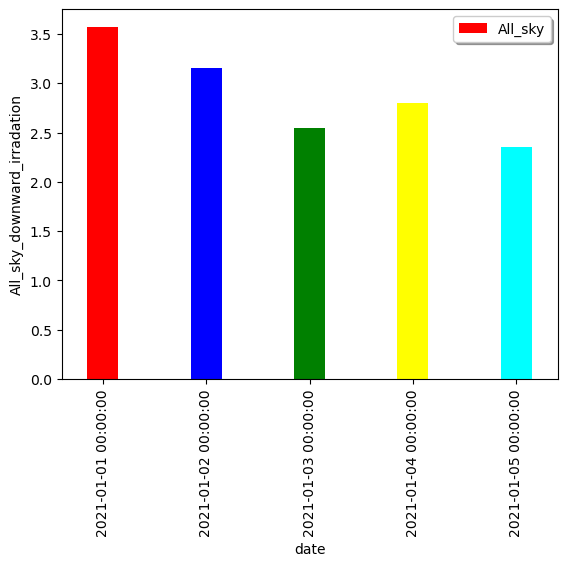

In [64]:
a=['red','blue','green','yellow','cyan']
df2.plot.bar(x='date',y='Allsky_downward_irradiation', color=a ,width=0.3, label='All_sky')
plt.ylabel('All_sky_downward_irradation')
plt.legend(shadow=True)
#plt.grid()
#according to specific date the specific values of allsky_downward_irradation in USA

## Power Data of Germany(Frankfurt)

In [65]:
df1=pd.read_csv("POWER_Point_Daily_20210101_20210331_050d1101N_008d5761E_LST.csv", skiprows=18)
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,WS2M,T2M,QV2M,RH2M,PRECTOTCORR,WS10M,WS50M,TS
0,2021,1,1,0.42,1.08,0.85,-0.13,3.60,95.12,0.80,1.47,2.27,-1.62
1,2021,1,2,0.59,1.20,1.41,-1.37,3.17,92.94,0.02,2.59,4.47,-2.54
2,2021,1,3,0.35,0.99,2.02,-0.88,3.36,94.19,1.50,3.25,5.41,-1.36
3,2021,1,4,0.27,0.93,1.52,-0.98,3.36,94.12,0.40,2.68,4.81,-1.57
4,2021,1,5,0.40,0.98,2.25,-0.93,3.36,94.88,0.40,3.61,6.27,-1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021,3,27,2.76,5.18,4.38,6.07,4.82,82.75,2.01,6.62,9.62,5.80
86,2021,3,28,3.53,4.89,2.41,6.94,4.94,81.44,0.01,3.99,6.41,6.68
87,2021,3,29,5.13,5.24,1.98,10.42,5.68,74.50,0.00,3.31,5.07,9.26
88,2021,3,30,5.54,5.54,1.04,13.71,5.92,62.19,0.00,1.70,2.45,11.24


# Data Cleaning

In [66]:
df1 = df1.rename({'YEAR':'year','MO':'month','DY':'day','ALLSKY_SFC_SW_DWN':'Allsky_downward_irradiation',
               'CLRSKY_SFC_SW_DWN':'Clrsky_downward_irradiation', 'WS2M':'Windspeed_2meter', 'T2M':'Temp_2meter',
               'QV2M':'Specific_humidity_2meter', 'RH2M':'Relative_humidity_2meter', 'PRECTOTCORR':'Precipitation',
               'WS10M':'Windspeed_10meter', 'WS50M':'Windspeed_50meter','TS':'Earth_skintemp'},axis=1)
df1.head()

,year,month,day,Allsky_downward_irradiation,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Specific_humidity_2meter,Relative_humidity_2meter,Precipitation,Windspeed_10meter,Windspeed_50meter,Earth_skintemp
0,2021,1,1,0.42,1.08,0.85,-0.13,3.60,95.12,0.80,1.47,2.27,-1.62
1,2021,1,2,0.59,1.20,1.41,-1.37,3.17,92.94,0.02,2.59,4.47,-2.54
2,2021,1,3,0.35,0.99,2.02,-0.88,3.36,94.19,1.50,3.25,5.41,-1.36
3,2021,1,4,0.27,0.93,1.52,-0.98,3.36,94.12,0.40,2.68,4.81,-1.57
4,2021,1,5,0.40,0.98,2.25,-0.93,3.36,94.88,0.40,3.61,6.27,-1.46


# Combining Year, Month and Day as Date

In [67]:
df1['date']=pd.to_datetime(df1[['year','month','day']])
df1.head()

,year,month,day,Allsky_downward_irradiation,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Specific_humidity_2meter,Relative_humidity_2meter,Precipitation,Windspeed_10meter,Windspeed_50meter,Earth_skintemp,date
0,2021,1,1,0.42,1.08,0.85,-0.13,3.60,95.12,0.80,1.47,2.27,-1.62,2021-01-01
1,2021,1,2,0.59,1.20,1.41,-1.37,3.17,92.94,0.02,2.59,4.47,-2.54,2021-01-02
2,2021,1,3,0.35,0.99,2.02,-0.88,3.36,94.19,1.50,3.25,5.41,-1.36,2021-01-03
3,2021,1,4,0.27,0.93,1.52,-0.98,3.36,94.12,0.40,2.68,4.81,-1.57,2021-01-04
4,2021,1,5,0.40,0.98,2.25,-0.93,3.36,94.88,0.40,3.61,6.27,-1.46,2021-01-05


# Removing some columns

In [68]:
df1 = df1.drop(['year','month','day','Precipitation'],axis=1)
df1.head() 

,Allsky_downward_irradiation,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Earth_skintemp,date
0,0.42,1.08,0.85,-0.13,3.60,95.12,1.47,2.27,-1.62,2021-01-01
1,0.59,1.20,1.41,-1.37,3.17,92.94,2.59,4.47,-2.54,2021-01-02
2,0.35,0.99,2.02,-0.88,3.36,94.19,3.25,5.41,-1.36,2021-01-03
3,0.27,0.93,1.52,-0.98,3.36,94.12,2.68,4.81,-1.57,2021-01-04
4,0.40,0.98,2.25,-0.93,3.36,94.88,3.61,6.27,-1.46,2021-01-05


In [69]:
titles1 = list(df1.columns)
titles1[0],titles1[9]=titles1[9],titles1[0]                                         #reordering the index

In [70]:
df1 = df1[titles1]
df1.tail()

,date,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Earth_skintemp,Allsky_downward_irradiation
85,2021-03-27,5.18,4.38,6.07,4.82,82.75,6.62,9.62,5.80,2.76
86,2021-03-28,4.89,2.41,6.94,4.94,81.44,3.99,6.41,6.68,3.53
87,2021-03-29,5.24,1.98,10.42,5.68,74.50,3.31,5.07,9.26,5.13
88,2021-03-30,5.54,1.04,13.71,5.92,62.19,1.70,2.45,11.24,5.54
89,2021-03-31,5.36,1.55,14.08,6.59,67.19,2.57,3.81,12.62,5.34


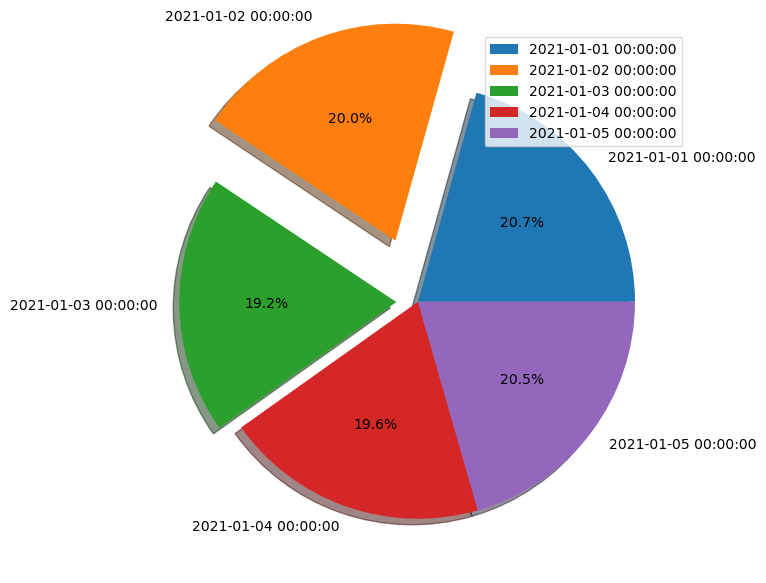

In [71]:
x = df2['date']
y = df2['Clrsky_downward_irradiation']
plt.figure(figsize=(7,10))
plt.pie(y,labels=x,explode=[0,0.3,0.1,0,0], shadow=True, autopct='%2.1f%%')
plt.legend()
plt.show()

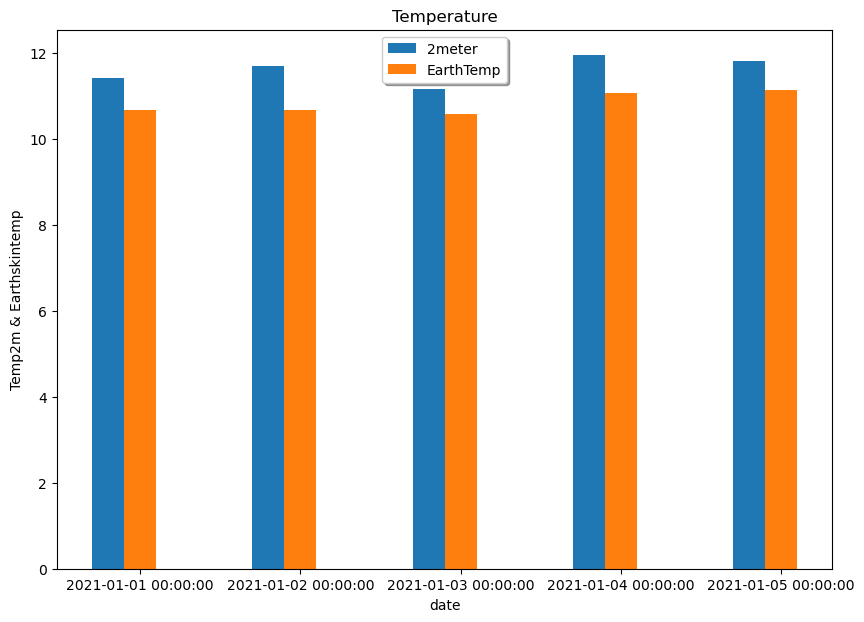

In [72]:
Dates = df2['date']

Temp2m = df2['Temp_2meter']
Earthskintemp = df2['Earth_skintemp']

w=0.2

plt.figure(figsize=(10,7))
Temp2m_bar = np.arange(len(Dates))
Earthskintemp_bar = [i+w for i in Temp2m_bar]

plt.bar(Temp2m_bar,Temp2m,width=w,label='2meter')
plt.bar(Earthskintemp_bar,Earthskintemp,width=w,label='EarthTemp')

plt.xticks(Temp2m_bar+w,Dates)
plt.xlabel('date')
plt.ylabel('Temp2m & Earthskintemp')
plt.title('Temperature')

plt.legend(shadow=True)
plt.show()

# Specific Data february month

In [73]:
df3=df1.iloc[31:36,:]                                                    #value of specific february month
df3.head()                                                               #relative humidity 2meter

,date,Clrsky_downward_irradiation,Windspeed_2meter,Temp_2meter,Specific_humidity_2meter,Relative_humidity_2meter,Windspeed_10meter,Windspeed_50meter,Earth_skintemp,Allsky_downward_irradiation
31,2021-02-01,1.79,2.20,1.50,4.27,96.69,3.35,5.00,1.01,0.73
32,2021-02-02,1.99,2.30,3.81,5.25,98.75,3.84,7.03,2.98,0.70
33,2021-02-03,1.96,4.44,8.44,6.71,95.00,6.57,10.14,7.65,0.49
34,2021-02-04,2.23,2.71,5.84,5.07,87.69,4.18,6.47,5.23,1.85
35,2021-02-05,1.87,1.36,5.12,5.37,96.19,2.28,3.99,4.65,0.44


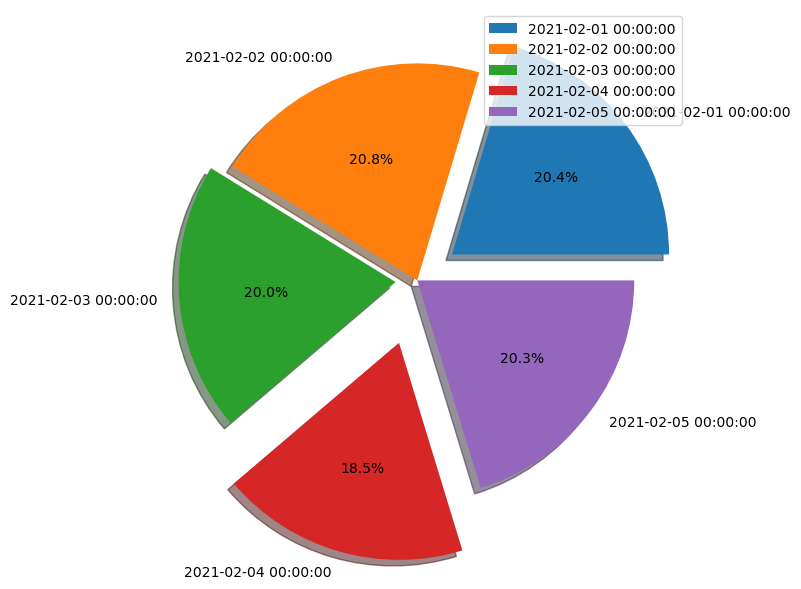

In [79]:
x = df3['date']
y = df3['Relative_humidity_2meter']
plt.figure(figsize=(7,10))
plt.pie(y,labels=x,explode=[0.2,0,0.1,0.3,0], shadow=True, autopct='%2.1f%%')
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

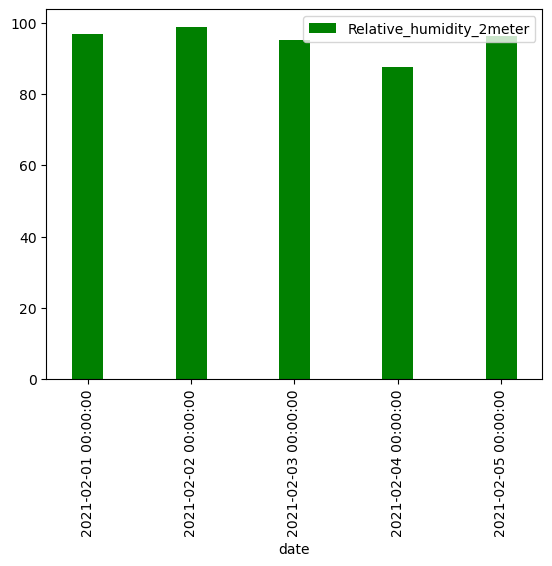

In [80]:
df3.plot.bar(x='date',y='Relative_humidity_2meter', color= "g",width=0.3)

#according to specific date the specific values of relative humidity at 2meter in germany